In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plot_anomalies import *

# Testing iForest on cancer data

In [18]:
df = pd.read_excel("DiabetesDiagnosis.xls")

In [19]:
df.head(2)

,Pregnancies,PG Concentration,Diastolic BP,Tri Fold Thick,Serum Ins,BMI,DP Function,Age,Diagnosis
0,6,148,72,35,0,33.6,0.627,50,0
1,1,85,66,29,0,26.6,0.351,31,1


In [20]:
df.Diagnosis.value_counts()

1    500
0    268
Name: Diagnosis, dtype: int64

There are 212 data points which arw classfied as skin cancer

In [21]:
X, y = df.drop('Diagnosis', axis=1), df['Diagnosis']

fit time 1.33s
score time 0.91s
Computed 0.7500 TPR threshold 0.4300 with FPR 0.9216
[[ 21 247]
 [ 74 426]]
Proportion anomalies/normal = 500/268 = 186.6%
F1 score 0.7263, avg PR 0.5382


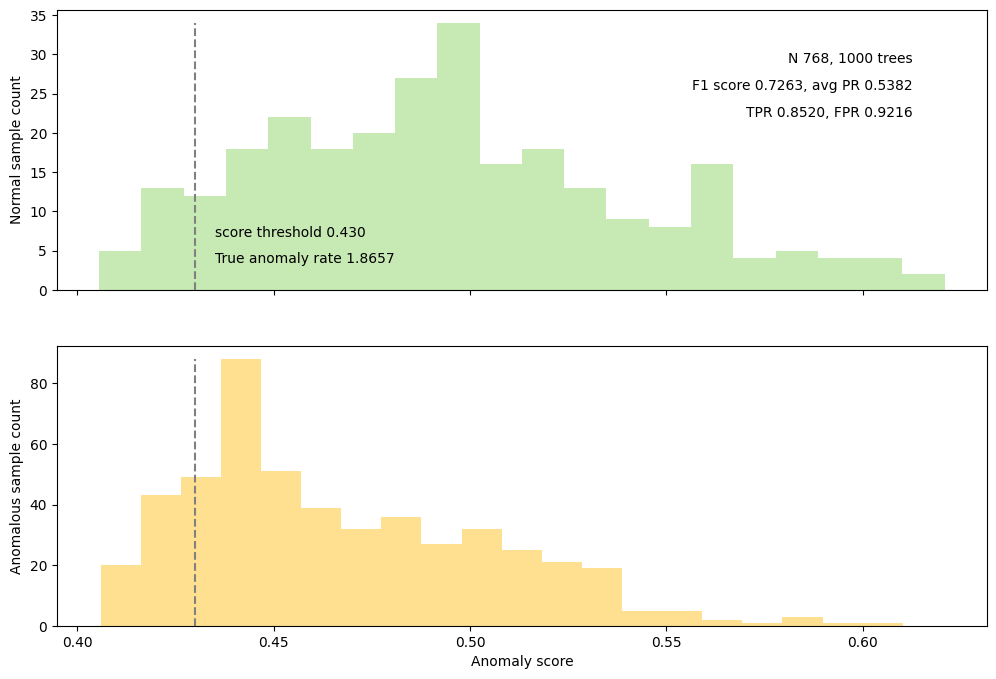

In [22]:
plt.rcParams['figure.figsize'] = [12, 8]
plot_anomalies(X, y, sample_size=5, n_trees=1000, 
               desired_TPR=0.75, improved=True)

I am going to adding noise columns to the DataFrame and test if algorithm is still performs the same.

In [8]:
add_noise(df, 5)
df.head(2)

,Pregnancies,PG Concentration,Diastolic BP,Tri Fold Thick,Serum Ins,BMI,DP Function,Age,Diagnosis,noise_0,noise_1,noise_2,noise_3,noise_4
0,6,148,72,35,0,33.6,0.627,50,0,53.177434,24.557803,151.909951,-151.141882,15.227922
1,1,85,66,29,0,26.6,0.351,31,1,151.695907,169.975008,-26.147825,72.749409,-35.026140


In [9]:
X, y = df.drop('Diagnosis', axis=1), df['Diagnosis']

fit time 1.36s
score time 0.93s
Computed 0.7500 TPR threshold 0.4300 with FPR 0.9515
[[ 13 255]
 [ 73 427]]
Proportion anomalies/normal = 500/268 = 186.6%
F1 score 0.7225, avg PR 0.5328


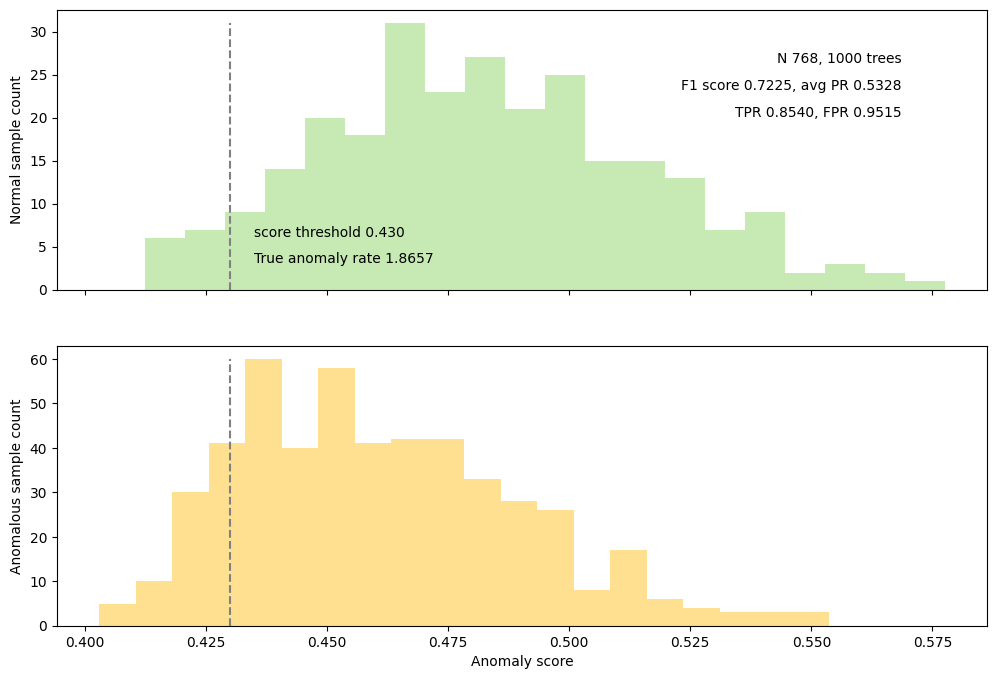

In [10]:
plot_anomalies(X, y, sample_size=5, n_trees=1000, 
               desired_TPR=0.75, improved=True)

I am able to classify cancer diagnosis using my iForest algorithm with F1 score of ~0.74-0.76.